# Convert Signal Multi-Axis test

In this notebook, we check whether the function of convert.py file work as expected for multi-axis data

## Step 1: Import libraries

In [7]:
import pandas as pd
import numpy as np
from caits import visualization as vis
from caits import convert as cnv
from caits.fe import spectrogram

## Step 2: Initialize dataset

In [25]:
# Parameters
sample_rate = 1000
duration = 1.0
n_fft = 200
hop_length = 100
n_channels = 2

# Generate time axis and multichannel signal: shape (samples, channels)
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
ch1 = np.sin(2 * np.pi * 50 * t)                   # 5 Hz sine wave
ch2 = np.sin(2 * np.pi * 100 * t + np.pi)          # 10 Hz sine with phase shift
ch3 = np.sin(2 * np.pi * 200 * t + np.pi)          # 15 Hz sine with phase shift
data = np.stack((ch1, ch2, ch3), axis=-1)              # shape: (1000, 2)

data.shape


(1000, 3)

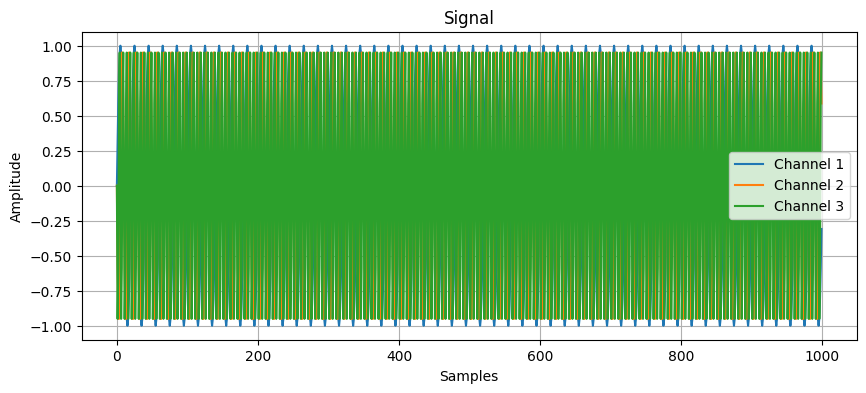

In [26]:
fig = vis.plot_signal(data, sample_rate)

## Step 3: Create feature maps

In [27]:
specs, f = spectrogram(y=data, n_fft=n_fft, hop_length=hop_length)
specs.shape

(3, 101, 11)

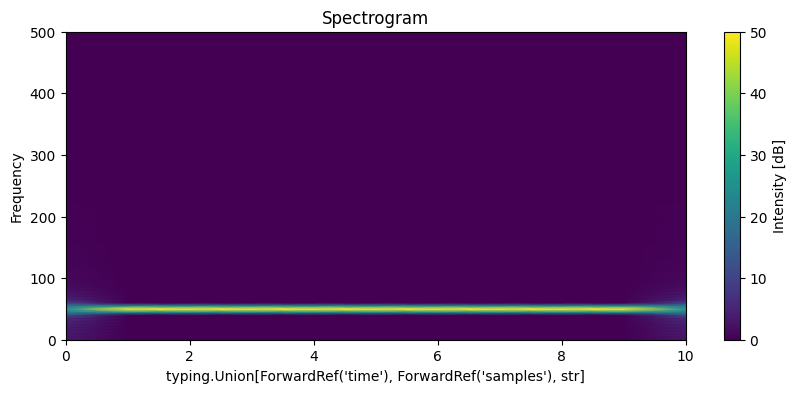

In [28]:
f = np.fft.rfftfreq(200, 1 / sample_rate)
x = np.arange(specs.shape[2])

fig = vis.plot_spectrogram(spec=specs[0], x=x, f=f)

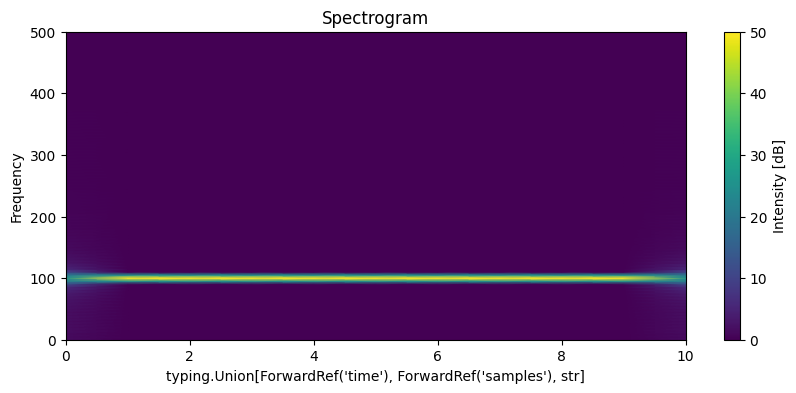

In [29]:
fig = vis.plot_spectrogram(spec=specs[1], x=x, f=f)

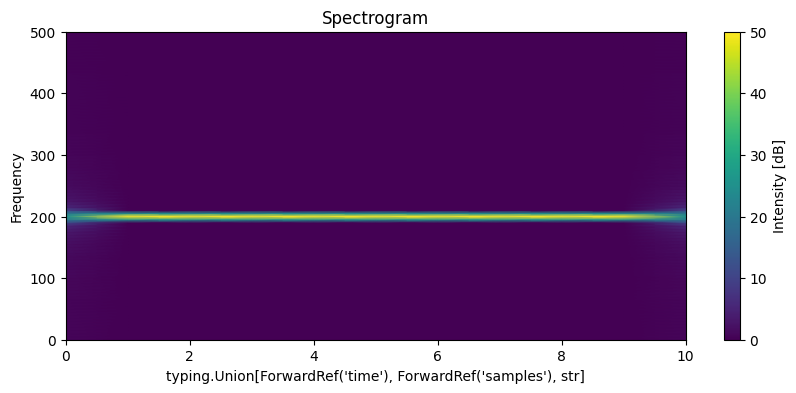

In [30]:
fig = vis.plot_spectrogram(spec=specs[2], x=x, f=f)

## Step 4: Convert times like

In [31]:
times_sig = cnv.times_like(specs, sr=sample_rate, hop_length=hop_length, n_fft=n_fft)
times_sig, x

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

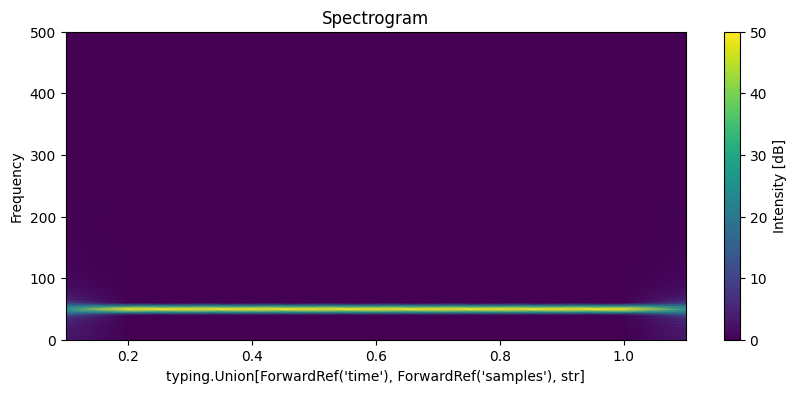

In [32]:
fig = vis.plot_spectrogram(spec=specs[0], x=times_sig, f=f)

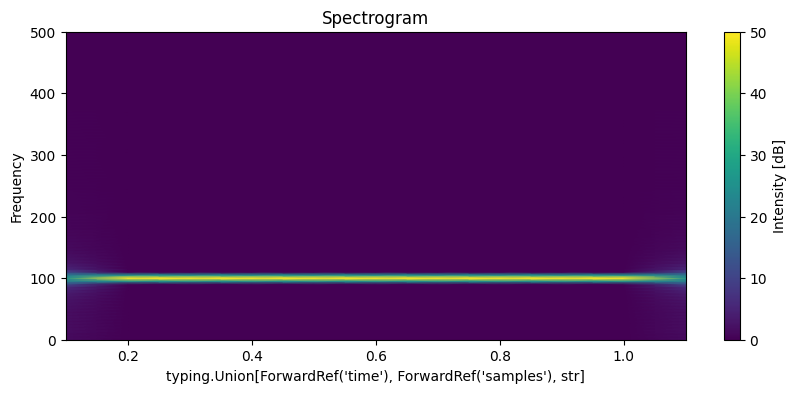

In [33]:
fig = vis.plot_spectrogram(spec=specs[1], x=times_sig, f=f)

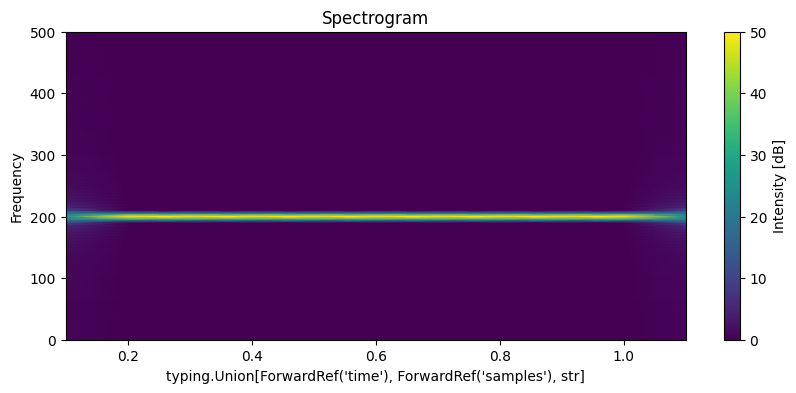

In [34]:
fig = vis.plot_spectrogram(spec=specs[2], x=times_sig, f=f)

## Step 5: Convert samples like

In [36]:
samples_sig = cnv.samples_like(specs, hop_length=hop_length, n_fft=n_fft)
samples_sig

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100])

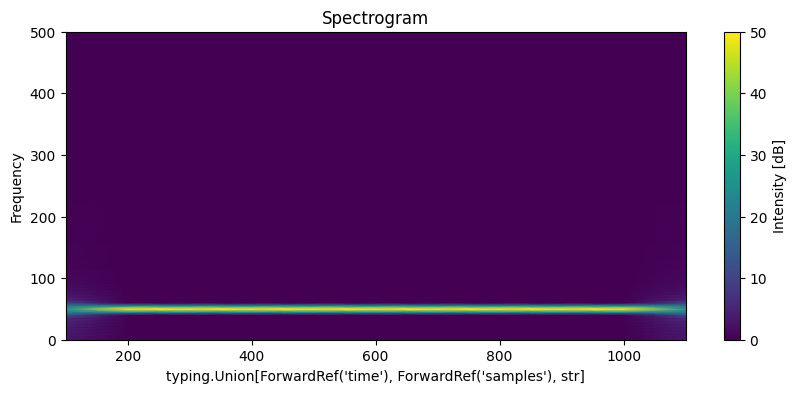

In [38]:
fig = vis.plot_spectrogram(spec=specs[0], x=samples_sig, f=f)

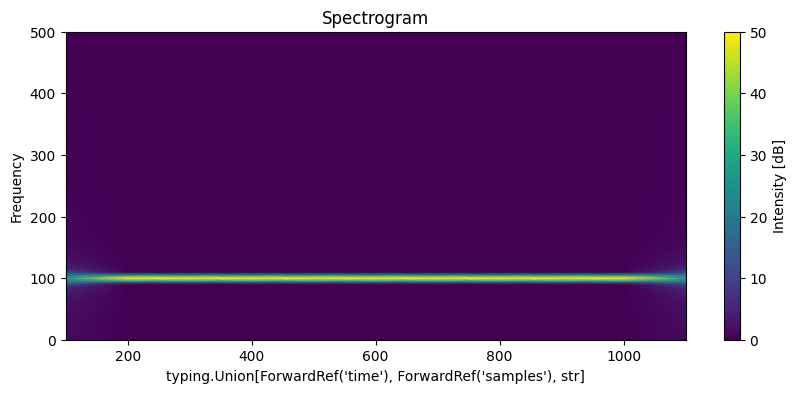

In [39]:
fig = vis.plot_spectrogram(spec=specs[1], x=samples_sig, f=f)

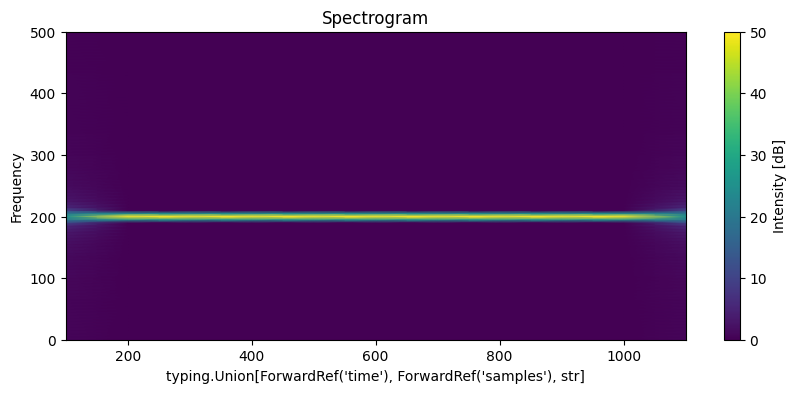

In [37]:
fig = vis.plot_spectrogram(spec=specs[2], x=samples_sig, f=f)